In [1]:
import os
import sys
sys.path.append(os.getcwd())

In [2]:
import wandb
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [3]:
def fetch_influence_tensor(project, run):
    """Fetch the Hessian eigenvalues from a wandb run."""
    eigenvalues_artifact = wandb.Api().artifact(f"wlp9800-new-york-university/{project}/run-{run.id}-outer_influence_tensor:v0")
    artifact_dir = eigenvalues_artifact.download()
    
    with open(f"{artifact_dir}/outer_influence_tensor.table.json") as file:
        json_dict = json.load(file)
    
    df = pd.DataFrame(json_dict["data"], columns=json_dict["columns"])
    return df.to_numpy()[1:]  # Remove first row


In [5]:
api = wandb.Api()
run_list = [
    ("rnn-test-src", "wpup1qpf")
]

data = {}
# Download all data first
for project, run_id in run_list:
    run = api.run(f"wlp9800-new-york-university/{project}/{run_id}")
    data[run_id] = {}
    
    # Pre-download the eigenvalues and hyperparameters
    influence = fetch_influence_tensor(project, run)
    
    # Store the downloaded data
    data[run.id] = {
        "influence": influence,
        "url": run.url,
    }


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb:   1 of 1 files downloaded.  


Run link: https://wandb.ai/wlp9800-new-york-university/rnn-test-src/runs/wpup1qpf


/tmp/ipykernel_24334/3480490374.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


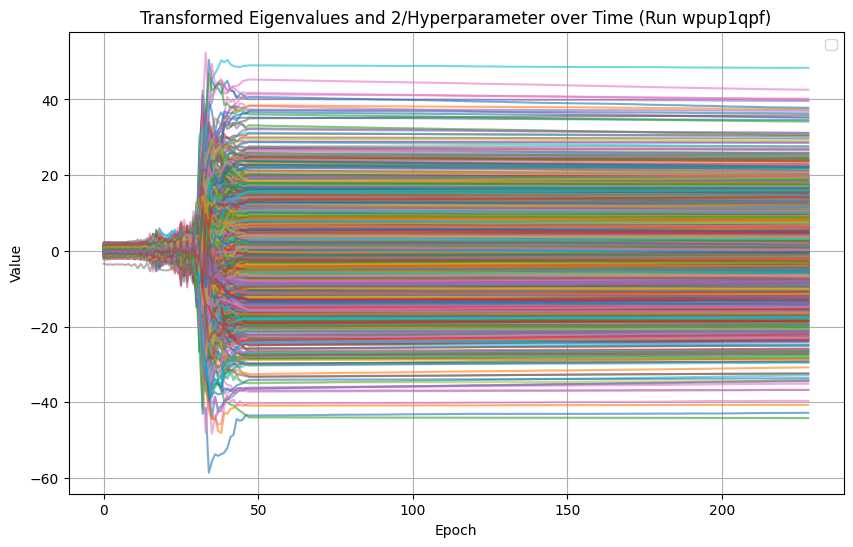

In [6]:

def plot_transformed_eigenvalues(transformed_eigenvalues, run_name):
    """Plot 2/hyperparameter_t and transformed eigenvalues over time."""
    epochs = np.arange(transformed_eigenvalues.shape[0])
    plt.figure(figsize=(10, 6))
    
    # Plot each transformed eigenvalue over time
    for i in range(transformed_eigenvalues.shape[1]):
        plt.plot(epochs, transformed_eigenvalues[:, i], alpha=0.6)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"Transformed Eigenvalues and 2/Hyperparameter over Time ({run_name})")
    plt.legend()
    plt.grid()
    plt.show()


for run_id, run_info in data.items():
    influence = run_info["influence"]

    print(f"Run link: {run_info['url']}")
    plot_transformed_eigenvalues(influence, f"Run {run_id}")
        
